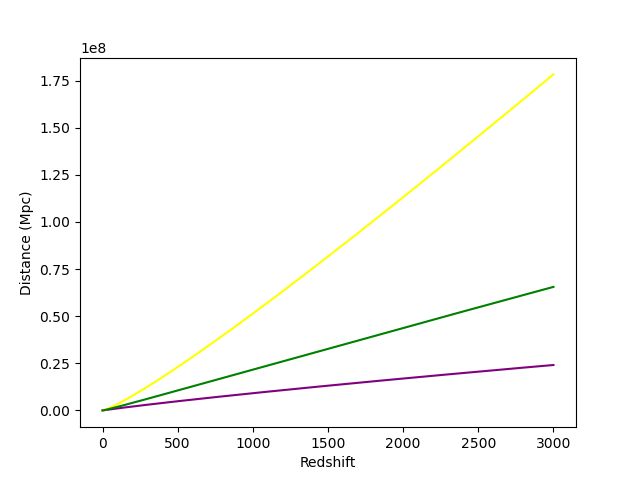

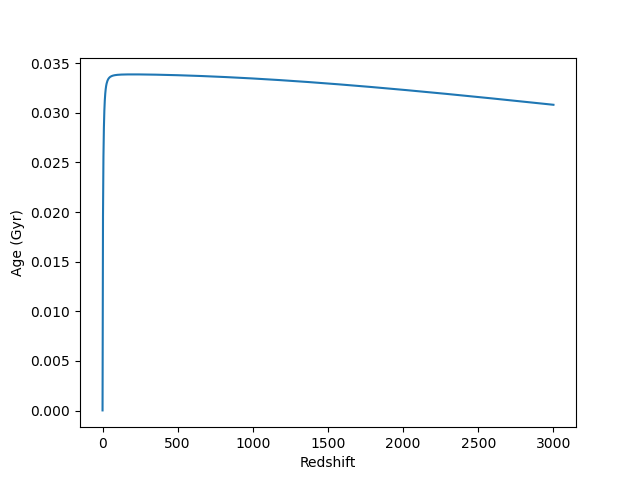

In [1]:
import numpy as np
import math

#Initializing variables
H_0 = 70
c = 300000 #km/s
Omega_r = .000084
Omega_L = .7
Omega_m = .3

#This takes an integral using trapezoidal integration
def trapezoidal_integral (f, a, b, n):
   h = (b-a)/n
   result = 0.5*f(a) + 0.5*f(b)
   for i in range(1, n):
       result += f(a + i*h)
   result *= h
   return result

#This takes an integral using midpoint integration
def midpoint_integral (f, a, b, n):
   x = np.linspace(a, b, num=n+1)
   dx = (b-a)/n
   integral = 0
   for j in range(n):
       xmid = (x[j] + x[j+1])/2
       integral += f(xmid)*dx
   return(integral)

#NOTE: BOTH OF THE ABOVE INTEGRATION METHODS PRODUCE THE SAME GRAPHS

#Creates an array of z values from 10^-3 to 3000
z = np.linspace(1e-3, 3e3, num = 1000)

#Defines the function f that is inside the integral for the proper, angular, and luminosity distances
def f(z):
   return (c/H_0)*(Omega_m*(1+z)**2+ Omega_L+ Omega_r*(1+z)**2)**(-1/2)

d_prop = (1+z)**(3/4)*midpoint_integral(f,0,z,n=1000)    #Integration of proper distance
d_lum = (1+z)*midpoint_integral(f,0,z,n=1000) #Integration of luminosity distance
d_ang = (1+z)**(7/8)*midpoint_integral(f,0,z,n=1000) #Integration of angular distance

#Defines the function f that is inside the integral for age
def t(z):
   return (1/H_0)/(Omega_m*(1+z)**3+Omega_L*(1+z)+Omega_r*(1+z)**6)**(1/2)

age = midpoint_integral (t, 0, z, n=1000) #Integration of age

#Plots

import matplotlib.pyplot as plt

plt.plot(z, d_prop , color='purple')
plt.plot(z, d_lum, color='yellow')
plt.plot(z, d_ang, color='green')
plt.ylabel('Distance (Mpc)')
plt.xlabel('Redshift')
plt.show()

plt.plot(z, age)
plt.ylabel('Age (Gyr)')
plt.xlabel('Redshift')
plt.show()

